## Problem Description
The TSP can be defined as follows: for a given list of cities and the distances between each pair of them, we want to find the shortest possible route that goes to each city once and returns to the origin city.

There is a class of Traveling Salesman Problems that assumes that the distance of going from city $i$ to city $j$  is the same as going form city $j$ to city $i$, this type of Traveling Salesman Problem  is also known as the symmetric Traveling Salesman Problem. In this example, we use Euclidean distances, but the TSP model formulation is valid independent of the way in which the individual distances are determined.


## TSP Model Formulation

### Sets and Indices
$i, j \in Capitals $: indices and set of US capital cities.

$\text{Pairings}= \{(i,j) \in Capitals \times Capitals \}$: Set of allowed pairings

$S \subset Capitals$: A subset of the set of US capital cities.

$G = (Capitals, Pairings)$: A graph where the set $Capitals$ defines the set of nodes and the set $Pairings$ defines the set of edges. 

### Parameters 

$d_{i, j} \in \mathbb{R}^+$: Distance from capital city $i$ to capital city $j$, for all $(i, j) \in Pairings$. 

Notice that the distance from capital city $i$ to capital city $j$ is the same as the distance from capital city $j$ to capital city $i$, i.e. $d_{i, j} = d_{j, i}$. For this reason, this TSP is also called the symmetric Traveling Salesman Problem.

### Decision Variables
$x_{i, j} \in \{0, 1\}$: This variable is equal to 1, if we decide to connect city $i$ with city $j$. Otherwise, the decision variable is equal to zero.

$u_{i} \in \mathbb{Z}$: This variable ranks a city in order of the city is visited.

### Objective Function
- **Shortest Route**. Minimize the total distance of a route. A route is a sequence of capital cities where the salesperson visits each city only once and returns to the starting capital city.

\begin{equation}
\text{Min} \quad Z = \sum_{(i,j) \in \text{Pairings}}d_{i,j} \cdot x_{i,j}
\tag{0}
\end{equation}

### Constraints 

- **Entering a capital city**. For each capital city $i$, ensure that this city is entered once. 

\begin{equation}
\sum_{i \in Capitals}x_{i,j} = 1 \quad \forall  j \in Capitals \quad i \neq j
\tag{1}
\end{equation}

- **Leaving a capital city**. For each capital city $i$, ensure that this city is exited once. 

\begin{equation}
\sum_{j \in Capitals}x_{i,j} = 1 \quad \forall  i \in Capitals \quad i \neq j
\tag{2}
\end{equation}

- **Subtour elimination**. These constraints ensure that for any subset of cities $S$ of the set of $Capitals$, there is no cycle. That is, there is no route that visits all the cities in the subset and returns to the origin city.

\begin{equation}
x_{i,j} = 1 \Rightarrow \quad u_{i} + 1 = u_{j} \quad \forall (i, j) \in Pairings
\tag{3}
\end{equation}

- **Remark**. In general, if the number of cities of the TSP is $n$, then the possible number of routes is n\!.


In [1]:
from gurobipy import *
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import math

In [2]:
coordinates = {'Depot': (12, 0), 'A': (4, 10), 'B': (4, 6), 'C': (8, 10), 
                 'D': (8, 6), 'E': (16, 10), 'F': (16, 6), 'G': (20, 10), 'H': (20, 6)}
# coordinates = {'Depot': (12, 0), 'B': (4, 6), 'C': (8, 10), 
#                  'D': (8, 6), 'E': (16, 10), 'H': (20, 6)}
coordinates

{'Depot': (12, 0),
 'A': (4, 10),
 'B': (4, 6),
 'C': (8, 10),
 'D': (8, 6),
 'E': (16, 10),
 'F': (16, 6),
 'G': (20, 10),
 'H': (20, 6)}

In [3]:
capitals = list(coordinates.keys())

In [4]:
X = np.array([x[0] for x in coordinates.values()])
Y = np.array([x[1] for x in coordinates.values()])

In [5]:
n = len(coordinates)
nodes = [i for i in range(n)]
nodes

[0, 1, 2, 3, 4, 5, 6, 7, 8]

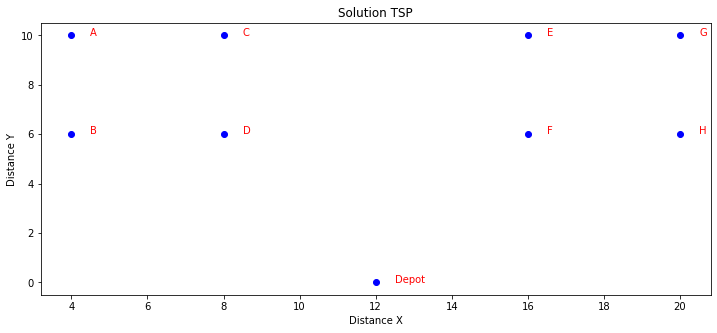

In [6]:
plt.figure(figsize=(12, 5))
plt.scatter(X, Y, color='blue')
  
for n in range(len(X)):
    plt.annotate(capitals[n], xy=(X[n], Y[n]),
                xytext=(X[n]+0.5, Y[n]), color='red')
    
# for n in range(len(X)):
#     plt.annotate(str(n), xy=(X[n], Y[n]),
#                 xytext=(X[n]+0.5, Y[n]), color='red')
    
plt.xlabel('Distance X')
plt.ylabel('Distance Y')
plt.title('Solution TSP')

plt.show()

In [7]:
# Compute pairwise distance matrix

def compute_distance(c1, c2):
    #c1 = coordinates[city1]
    #c2 = coordinates[city2]
    diff = (c1[0]-c2[0], c1[1]-c2[1])
    return math.sqrt(diff[0]*diff[0]+diff[1]*diff[1])
    #return np.abs(diff[0]) + np.abs(diff[1])

In [8]:
distance = {(i, j): compute_distance(list(coordinates.values())[i], list(coordinates.values())[j])
            for i in nodes for j in nodes if i!=j}
print(distance)

{(0, 1): 12.806248474865697, (0, 2): 10.0, (0, 3): 10.770329614269007, (0, 4): 7.211102550927978, (0, 5): 10.770329614269007, (0, 6): 7.211102550927978, (0, 7): 12.806248474865697, (0, 8): 10.0, (1, 0): 12.806248474865697, (1, 2): 4.0, (1, 3): 4.0, (1, 4): 5.656854249492381, (1, 5): 12.0, (1, 6): 12.649110640673518, (1, 7): 16.0, (1, 8): 16.492422502470642, (2, 0): 10.0, (2, 1): 4.0, (2, 3): 5.656854249492381, (2, 4): 4.0, (2, 5): 12.649110640673518, (2, 6): 12.0, (2, 7): 16.492422502470642, (2, 8): 16.0, (3, 0): 10.770329614269007, (3, 1): 4.0, (3, 2): 5.656854249492381, (3, 4): 4.0, (3, 5): 8.0, (3, 6): 8.94427190999916, (3, 7): 12.0, (3, 8): 12.649110640673518, (4, 0): 7.211102550927978, (4, 1): 5.656854249492381, (4, 2): 4.0, (4, 3): 4.0, (4, 5): 8.94427190999916, (4, 6): 8.0, (4, 7): 12.649110640673518, (4, 8): 12.0, (5, 0): 10.770329614269007, (5, 1): 12.0, (5, 2): 12.649110640673518, (5, 3): 8.0, (5, 4): 8.94427190999916, (5, 6): 4.0, (5, 7): 4.0, (5, 8): 5.656854249492381, (6, 

In [9]:
arcs = [(i, j) for i in nodes for j in nodes if i!=j]
print(arcs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)]


In [10]:
%%time
pjs_model = Model('TSP')

x_ij = pjs_model.addVars(arcs, vtype=GRB.BINARY, name='x')
u_ij = pjs_model.addVars(nodes, vtype=GRB.CONTINUOUS, name='U')

pjs_model.setObjective(quicksum(distance[arc]*x_ij[arc] for arc in arcs), GRB.MINIMIZE)

pjs_model.addConstrs(quicksum(x_ij[i, j] for j in nodes if j!=i)==1 for i in nodes)
pjs_model.addConstrs(quicksum(x_ij[i, j] for i in nodes if j!=i)==1 for j in nodes)

pjs_model.addConstrs((x_ij[i, j]==1) >> (u_ij[i]+1==u_ij[j]) for i, j in arcs if j!=0)

pjs_model.optimize()

Academic license - for non-commercial use only - expires 2021-12-08
Using license file C:\Users\parag\gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 18 rows, 81 columns and 144 nonzeros
Model fingerprint: 0xd9f8ca2d
Model has 64 general constraints
Variable types: 9 continuous, 72 integer (72 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve added 64 rows and 64 columns
Presolve time: 0.00s
Presolved: 82 rows, 145 columns, 308 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 73 continuous, 72 integer (72 binary)

Root relaxation: objective 4.407906e+01, 18 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


In [11]:
active_arcs = [i for i in arcs if x_ij[i].x> 0.9]
print(active_arcs)

[(0, 6), (1, 2), (2, 4), (3, 1), (4, 0), (5, 3), (6, 8), (7, 5), (8, 7)]


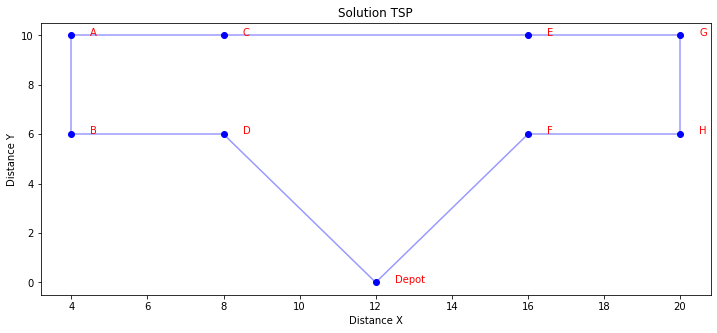

In [12]:
plt.figure(figsize=(12,5))

plt.xlabel('Distance X')
plt.ylabel('Distance Y')
plt.title('Solution TSP')

plt.scatter(x=X, y=Y, color='blue', zorder=1)

for i,j in active_arcs:
    plt.plot([X[i], X[j]], [Y[i], Y[j]], color='b', alpha=0.4, zorder=0)
    
for n in range(len(X)):
    plt.annotate(capitals[n], xy=(X[n], Y[n]),
                xytext=(X[n]+0.5, Y[n]), color='red')
    
plt.show()    

# Useful links

https://www.youtube.com/watch?v=-m7ASCB0a8E&t=615s

https://www.youtube.com/watch?v=2maj3OG2feE

https://medium.com/swlh/techniques-for-subtour-elimination-in-traveling-salesman-problem-theory-and-implementation-in-71942e0baf0c